## Lab8

In [ ]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(71)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Clustering

#### Classification vs Clustering

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

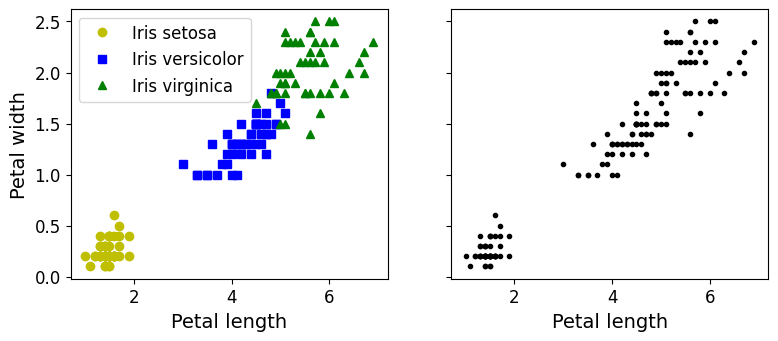

In [ ]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

*Classification (left) versus clustering (right)*


### K-Means

generating some blobs:

In [ ]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=71)

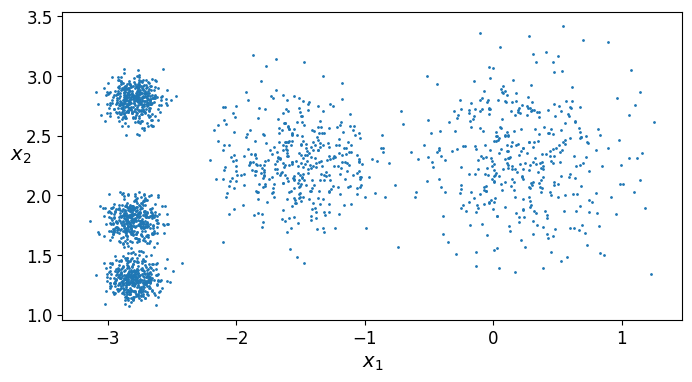

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

*An unlabeled dataset composed of five blobs of instances*

Let's train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

In [ ]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=71)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_pred

array([3, 3, 3, ..., 4, 0, 3], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[-2.79899776,  1.7930915 ],
       [ 0.22975047,  2.31266597],
       [-1.51204717,  2.27981173],
       [-2.78506776,  2.79777747],
       [-2.79963848,  1.30020743]])

In [ ]:
kmeans.labels_

array([3, 3, 3, ..., 4, 0, 3], dtype=int32)

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

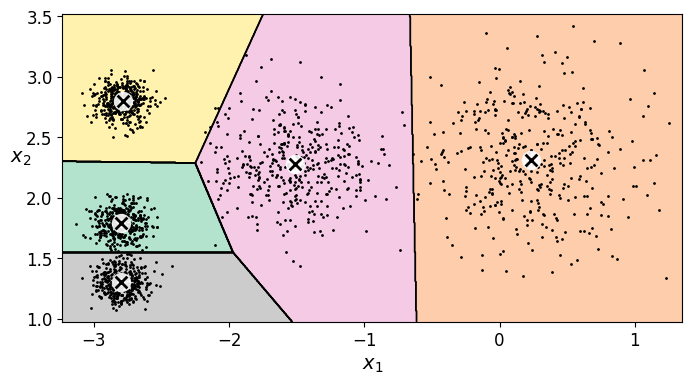

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

10. Cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the cluster

In [ ]:
# Load data
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv("sample_data/kc_house_data.csv")

houses_num = df.drop("date", axis=1).drop("floors", axis=1).drop("bathrooms", axis=1)
num_attribs = list(houses_num)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

houses = full_pipeline.fit_transform(df)
labels = np.array([int(x) for x in df["floors"]]).copy()

print(houses.shape)
print(labels.shape)

(21613, 18)
(21613,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(houses, labels, test_size=0.2, random_state=71)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size = 0.25)
print(X_train.shape)
print(y_train.shape)

(12967, 18)
(12967,)


In [ ]:
from sklearn.cluster import KMeans

k_range = range(5, 300, 5)
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=71).fit(X_train)
    kmeans_per_k.append(kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

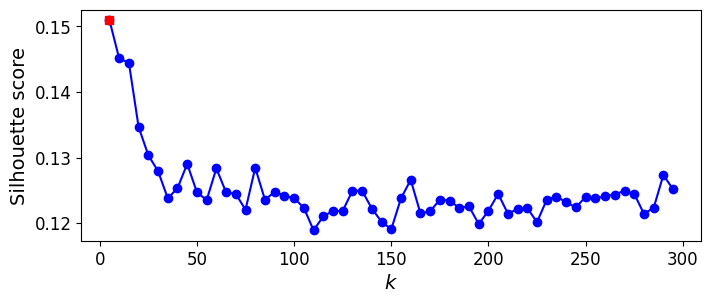

5


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

print(best_k)

In [ ]:
best_model = kmeans_per_k[best_index]
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    x_cluster = X_train[in_cluster]
    y_cluster = y_train[in_cluster]
    print(x_cluster)
    print(y_cluster)

Cluster 0
[[-1.54883852  4.35802329  0.67648506 ...  1.58278907  0.7491478
   7.41359858]
 [-1.09758858  0.83055387  0.67648506 ...  3.2799299   1.43490332
   3.0422253 ]
 [-0.75064948  0.02672666  0.67648506 ...  0.75907219  0.38438422
   7.33382873]
 ...
 [-0.5403174   0.15938131  0.67648506 ...  1.74611225  0.55947074
   8.09962664]
 [-0.85193883 -0.79017533 -2.54918156 ...  1.83132434 -0.08251316
   5.59486059]
 [-0.43742498  0.84417344  0.67648506 ... -0.56171523 -0.02415098
   1.01171996]]
[2 2 2 2 1 2 2 2 2 1 1 1 2 1 1 2 1 1 2 2 2 2 2 1 1 1 2 2 1 2 1 1 1 1 1 2 2
 1 2 2 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 1 1 2 1 2 2 1 1 1 1 2 1 2 2 2 1 2 1 2
 2 1 1 1 1 2 1 2 1 1 2 2 2 2 2 1 1 2 1 1 1 2 2 1 2 1 1 1 1 1 2 1 1 2 1 2 2
 1 1 2 1 1 2 2 1 2 2 2 1 1 1 2 1 1 2 1 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 1 1 1
 1 1 2 1 2 1 2 1 1 2 2 2 2 1 1 2 1 1 2 2 1 2 1 2 1 1 1 1 1 2 1 2 2 2 1 1 2
 2 1 2 1 1 2 2 1 2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 2 2 2 1 1 2 2 2 2 2 1 2 2
 2 2 1 1]
Cluster 1
[[ 1.41325913 -0.60767305 -0.

11. train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=71), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=71),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.9044644922507518

In [ ]:
X_train_reduced = best_model.transform(X_train)
X_valid_reduced = best_model.transform(X_valid)
X_test_reduced = best_model.transform(X_test)

params = {'max_leaf_nodes': list(range(2, 25)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=71), params, verbose=1, cv=3)

grid_search_cv.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 69 candidates, totalling 207 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=71),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_valid_reduced)
accuracy_score(y_valid, y_pred)

0.7770067083044182

Search for the number of clusters that allows the classifier to get the best performance

In [22]:
from sklearn.pipeline import Pipeline

params = {'max_leaf_nodes': list(range(2, 25)), 'min_samples_split': [2, 3]}

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=71)),
        ("forest_clf", GridSearchCV(DecisionTreeClassifier(random_state=71), params, verbose=1, cv=3))
    ])
    pipeline.fit(X_train, y_train)
    print(n_clusters, pipeline.score(X_valid, y_valid))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
5 0.7770067083044182


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
10 0.8202637057598889


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
15 0.8329863520703216


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
20 0.8311357853342586


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
25 0.8378440897524867


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
30 0.8359935230164238


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
35 0.8403886190145732


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
40 0.8475595651168171


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
45 0.851029377746935


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
50 0.8410825815405968


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
55 0.8394633356465417


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
60 0.8420078649086282


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
65 0.8433957899606754


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
70 0.8433957899606754


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
75 0.8427018274346518


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
80 0.8524173027989822


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
85 0.8447837150127226


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
90 0.85264862364099


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
95 0.8454776775387463


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
100 0.8540365486930372


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
105 0.8496414526948878


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
110 0.8489474901688642


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
115 0.8505667360629192


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
120 0.8477908859588249


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
125 0.8450150358547305


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
130 0.8540365486930372


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
135 0.8512606985889428


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
140 0.8547305112190609


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
145 0.8512606985889428


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
150 0.8505667360629192


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
155 0.8491788110108721


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
160 0.8505667360629192


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
165 0.8551931529030765


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
170 0.8572750404811473


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
175 0.8528799444829979


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
180 0.8519546611149664


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
185 0.8598195697432338


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
190 0.8528799444829979


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
195 0.8524173027989822


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
200 0.8491788110108721


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
205 0.85264862364099


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
210 0.8565810779551237


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
215 0.8577376821651631


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
220 0.8570437196391395


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
225 0.8503354152209114


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
230 0.8591256072172103


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
235 0.8565810779551237


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
240 0.8496414526948878


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
245 0.851029377746935


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
250 0.8632893823733518


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
255 0.8565810779551237


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
260 0.8572750404811473


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
265 0.8584316446911867


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
270 0.8600508905852418


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
275 0.8452463566967384


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
280 0.854499190377053


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
285 0.8588942863752024


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
290 0.8489474901688642


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 3 folds for each of 46 candidates, totalling 138 fits
295 0.8482535276428406


What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

In [23]:
X_train_extended = np.c_[X_train, X_train_reduced]
X_valid_extended = np.c_[X_valid, X_valid_reduced]
X_test_extended = np.c_[X_test, X_test_reduced]

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train_extended, y_train)

y_pred = grid_search_cv.predict(X_valid_extended)
accuracy_score(y_valid, y_pred)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


0.9063150589868147

12. Train a Gaussian mixture model

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=71)
y_pred = gm.fit_predict(X_train)

In [25]:
n_gen = 20
x_gen, y_gen = gm.sample(n_samples=n_gen)
x_gen

array([[ 0.15692533, -1.25354838, -1.31895592, -1.04938663, -0.15289583,
        -0.08832687, -0.30696863,  0.90849012, -0.21089474, -0.70533534,
        -0.85796012,  0.15285056, -0.21004554,  0.35166499, -0.87707808,
        -0.54963382, -0.13327042, -0.20966841],
       [ 1.12336556,  0.15874416,  0.68803469,  0.65687272, -0.28263892,
        -0.08703576, -0.30669088,  1.39261196, -0.46157021, -0.36056747,
         2.04188781, -1.26105449, -0.20927628,  0.66219057,  0.8062626 ,
        -0.77130311, -0.34908122, -0.31929536],
       [ 0.7237188 ,  0.38256939,  2.02765916,  0.18307171, -0.20752272,
        -0.088353  , -0.30461521, -0.44974105,  0.21761089, -0.30593802,
         0.95139556, -1.14516385,  4.75641328,  0.71111102,  0.54413625,
        -0.79298792,  0.35400535, -0.16848436],
       [-1.9983513 ,  0.08726645,  0.01573481, -0.1076106 ,  0.63496636,
        -0.08743723, -0.30666467,  0.22835181, -0.60001812,  0.23294921,
        -0.66034151,  0.4642231 , -0.20997174, -1.142

Modify dataset and see if the model can detect the anomalies

In [26]:
n_multiplied = 10
X_bad = np.array([X_train[i] * 100 for i in range(n_multiplied)])
y_bad = y_train[:n_multiplied]

print(gm.score_samples(X_bad))
print(gm.score_samples(X_train[:10]))

[-3.80709939e+07 -3.79072130e+07 -3.81590436e+07 -3.80255019e+07
 -3.81588036e+07 -3.81429779e+07 -6.44882345e+11 -3.81356152e+07
 -3.79182548e+07 -3.79615797e+07]
[ 18.86301301  26.18794681  33.61000858  30.54659843  32.34702733
  31.49541204 -12.74105323   8.95859076  29.34619097  25.7001709 ]


13. Using Dimensionality Reduction Techniques for Anomaly Detection

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)

def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

reconstruction_errors(pca, X_train).mean()

In [28]:
reconstruction_errors(pca, X_bad).mean()

2.8628178114383484e-26

In [29]:
X_bad_pca = pca.fit_transform(X_bad)
X_bad_reconstructed = pca.inverse_transform(X_bad_pca)
print(X_bad_reconstructed)

[[ 2.24163935e+01 -5.26289959e+01 -2.66351851e+01  1.45604349e+01
  -1.15937298e+01 -1.05382666e+01 -3.17100671e+01 -6.29186873e+01
  -3.62530726e+01 -6.71894232e+01  1.55932548e+02 -6.26679692e+01
  -2.17945405e+01 -9.42501015e+01  1.52438090e+02 -4.14291862e+01
  -8.48958387e+01 -1.52000480e+01]
 [ 1.34032928e+02 -6.00993912e+01 -2.55252748e+01 -4.38862968e+01
  -1.92177246e+01 -6.53271198e+00 -3.77982340e+01 -6.29186873e+01
  -5.04491110e+01 -6.78987713e+01  3.59699228e+01  5.53516958e+01
  -2.00750768e+01 -5.06480419e+01 -6.12874987e+01  2.54547244e+01
  -5.16078152e+00 -1.91146572e+01]
 [-5.90018786e+01 -4.22746162e+01 -5.71777044e+01 -7.06313109e+01
  -2.99790508e+01 -6.91922310e+00 -2.82544713e+01 -6.29186873e+01
   5.75063900e+00 -3.78665368e+01 -7.57244395e+01  1.02055612e+02
  -2.02409943e+01  7.21926319e+01  9.37749362e+01 -6.93552971e+01
  -7.14884227e+01 -3.56424415e+01]
 [-1.55718622e+02 -5.86362344e+01  7.87581190e+01  2.76517368e+01
  -2.12566789e+01 -9.04036515e+00 -3.